In [1]:
"""
Bron van de code welke gebruikt is als basis:
https://github.com/HiSPARC/infopakket/blob/master/notebooks/10_sterrenkaart.md

Merk op dat hier en daar iets is aangepast
"""

from __future__ import division, print_function

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import tables
from sapphire import (download_coincidences, ReconstructESDCoincidences, HiSPARCStations)
from sapphire.utils import pbar
from sapphire.transformations.celestial import zenithazimuth_to_equatorial
import os
import time

In [2]:
events = np.loadtxt("data\\test.csv")
show_events = False

# RA, DEC tuples van het steelpan asterisme in het sterrenbeeld Grote Beer
"""
RA en DEC zijn vindbaar met Aladin. Coordinaten daarvandaan pakken en dan een functie maken voor het omzetten naar graden?
"""
steelpan = np.array([[13.792222, 49.3167], [13.398889, 54.9333], [12.900556, 55.95],
                     [12.257222, 57.0333], [11.896944, 53.7000], [11.030833, 56.3833],
                     [11.062222, 61.7500], [12.257222, 57.0333]])

In [3]:
# Melkweg contouren als lijst van RA, DEC paren.
# `milky_way.npy` heeft *geen* verbinding tussen RA 23h59 en 0h00 en `milky_way_polar.npy` wel.
try:
    mw_contour = np.load('milky_way.npy')
    print('Loaded .npy files')
except:
    mw_contour = []
    print('Failed to load .npy files')

Loaded .npy files


In [4]:
def plot_events_on_mollweide(events, filename=None):
    """Plot events (een lijst van RA, DEC tuples) op een kaart in Mollweide projectie"""

    # Let op: De RA-as is gespiegeld. Alle RA coordinates worden gespiegeld (negatief)
    # geplot.

    events = np.array(events)

    fig = plt.figure(figsize=(15, 15))
    #fig = plt.figure()
    ax = fig.add_subplot(111, projection="mollweide")
    # let op: De RA as is gespiegeld:
    ax.set_xticklabels(['22', '20', '18', '16', '14', '12', '10', '8', '6', '4', '2'], fontsize='large')
    ax.set_yticklabels(['-75', '-60', '-45', '-30', '-15', '0', '15', '30', '45', '60', '75'], fontsize='large')
    ax.grid(True)
    ax.tick_params(axis='x', colors='white')
    ax.xaxis.label.set_color('white')
    ax.xaxis.set_label_coords(.5, .49)
    
        # plot milky way contours
    for ra_mw, dec_mw in mw_contour:
        ax.plot(-ra_mw, dec_mw, color='grey')

    """
    Plot bron:
    https://python-graph-gallery.com/85-density-plot-with-matplotlib/
    """
    from scipy.stats import kde
    x = -events[:, 0]
    y = events[:, 1]

    
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    t7 = time.time()
    
    nbins = 200
    k = kde.gaussian_kde([x, y])
    
    t8 = time.time()
    print('kde.gaussian_kde: %.2f' % (t8-t7))
    
    xi, yi = np.mgrid[x.min():x.max():nbins * 1j, y.min():y.max():nbins * 1j]
    
    t9 = time.time()
    print('np.mgrid: %.2f' % (t9-t8))
    
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    t10 = time.time()
    print('np.vstack: %.2f' % (t10-t9))
    """ 
    Colormaps: https://matplotlib.org/examples/color/colormaps_reference.html
    jet

    """
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.jet, alpha=1)
    
    t11 = time.time()
    print(' plt.pcolormesh: %.2f' % (t11-t10))
    
    plt.colorbar(shrink=0.5, pad=0.01)
    if show_events:
        ax.scatter(-events[:, 0], events[:, 1], marker='x', alpha=.5, color='grey', label='events')

    # plot milky way contours
    for ra_mw, dec_mw in mw_contour:
        ax.plot(-ra_mw, dec_mw, color='grey')

    # plot steelpan in UMa
    ra_uma = np.radians(steelpan[:, 0] / 24 * 360 - 180.)
    dec_uma = np.radians(steelpan[:, 1])
    ax.plot(-ra_uma, dec_uma, color='white')
    ax.scatter(-ra_uma, dec_uma, color='white', s=10)

    # plot Polaris
    #ax.scatter(0., np.radians(90.), color='white', marker='*')
    #ax.text(np.radians(2.), np.radians(78.), 'Polaris', color='white', fontsize='10')

    # plot Galactic Center (RA 17h45, DEC -29)
    #ax.scatter(-np.radians(17.75 / 24 * 360 - 180.), np.radians(-29), color='white', marker='*')
    #ax.text(-np.radians(17.75 / 24 * 360 - 180. +2.), np.radians(-29 - 6.), 'Galactic Center', color='white', fontsize='10')

    plt.grid(alpha=.3)
    plt.xlabel('Rechte klimming [h]', fontsize='large')
    plt.ylabel('Declinatie [°]', fontsize='large')
    plt.tight_layout()
    #plt.legend()

    if filename:
        plt.savefig(filename, dpi=200)
    plt.show()

kde.gaussian_kde: 0.00
np.mgrid: 0.00
np.vstack: 2.53
 plt.pcolormesh: 0.01


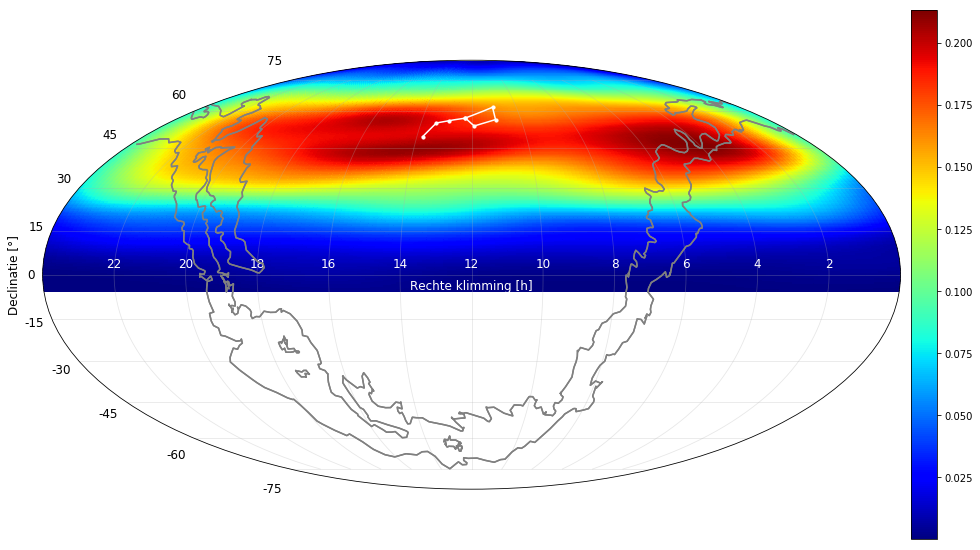

test


In [5]:
plot_events_on_mollweide(events, filename='figuren\\noordelijke_hemel_mollweide.png')
print('test')